# Challenge 3

In [12]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
'''
%matplotlib inline
'''

'\n%matplotlib inline\n'

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [4]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [5]:
# your code here- numerical variable
titanic.select_dtypes('number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [7]:
#your code here- categorical variable
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [16]:
# your code here
plt.style.use('classic')
plt.rcParams["figure.figsize"] = (12,6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

Text(0.5, 0, 'Age')

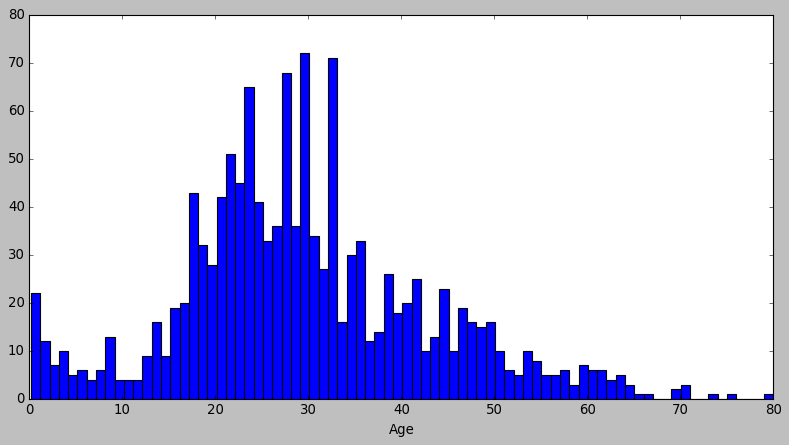

In [20]:
# your code here
plt.hist(titanic.Age, bins=80)
plt.xlabel('Age')

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

<AxesSubplot:>

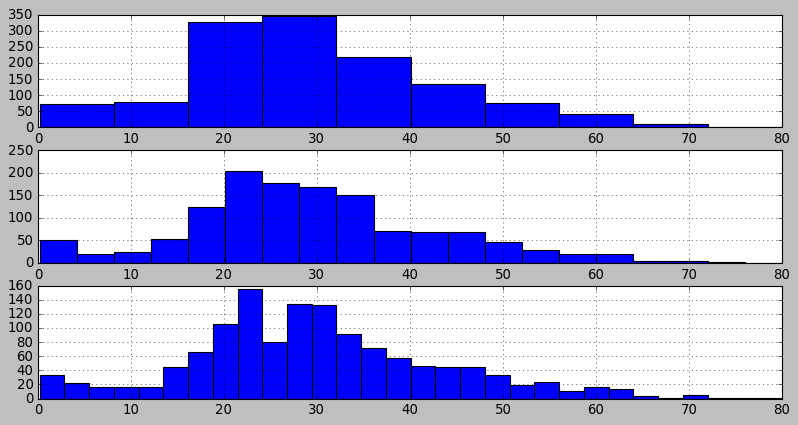

In [22]:
# your code here
fig,axes=plt.subplots(3,1)
plt.sca(axes[0])
titanic['Age'].hist(bins=10)
plt.sca(axes[1])
titanic['Age'].hist(bins=20)
plt.sca(axes[2])
titanic['Age'].hist(bins=30)

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
#Los bins afectan mi visualización, a mayor valor de bin, puedo obtener mayor cantidad de intervalos,
#con lo que puedo ver con mayor detalle la distribución de mis datos.

#### Use seaborn to show the distribution of the column `Age`

In [24]:
# your code here
#sns.histplot(titanic.Age)

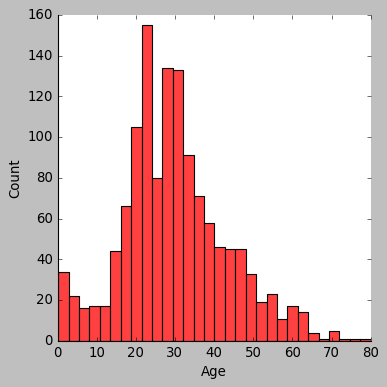

In [29]:
sns.displot(titanic.Age, color = 'red', )

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

<AxesSubplot:>

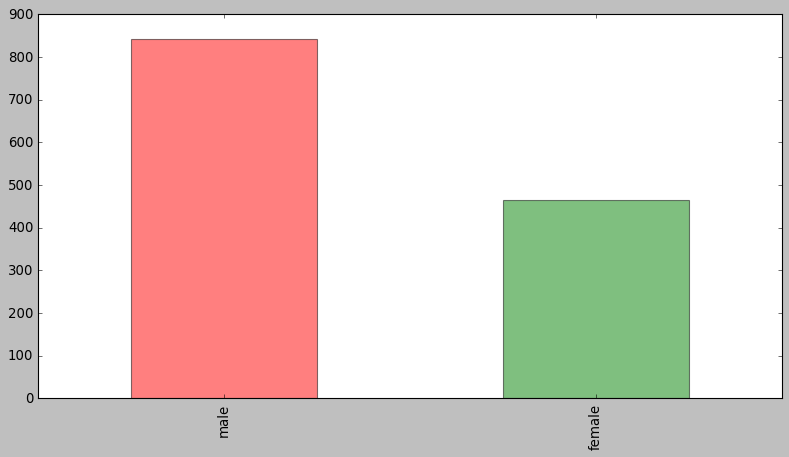

In [35]:
# your code here- 1st way
titanic.Gender.value_counts().plot(kind='bar',alpha = 0.5, color =['red', 'green'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

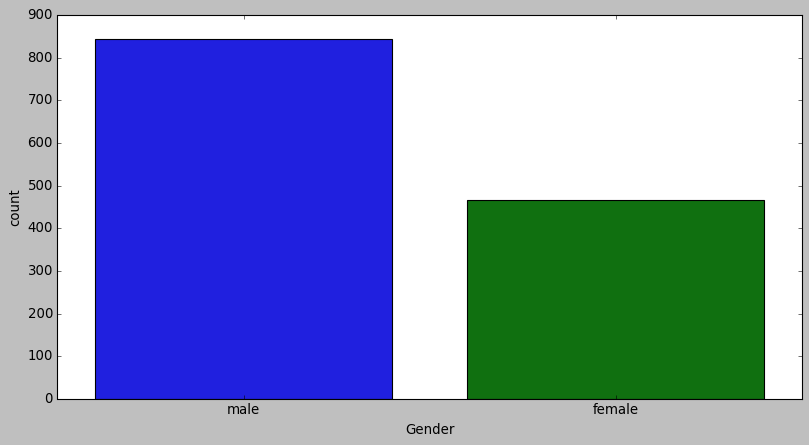

In [37]:
# your code here- 2nd way
sns.countplot(x="Gender", data=titanic)

#### Use the appropriate plot to visualize the column `Pclass` 


<AxesSubplot:xlabel='Pclass', ylabel='count'>

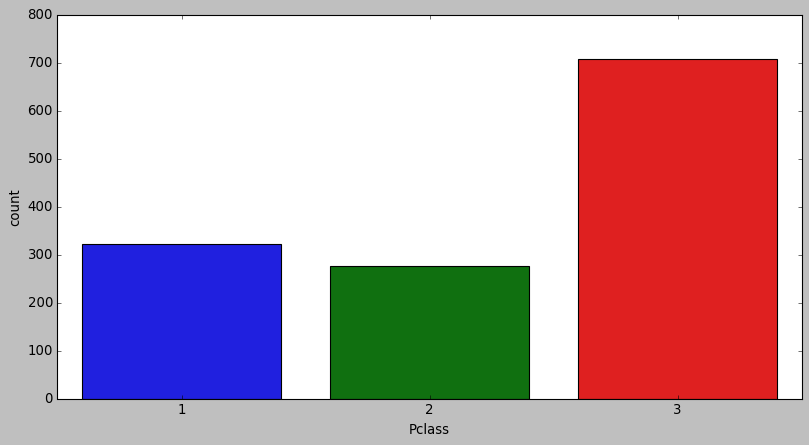

In [38]:
# your code here
sns.countplot(x="Pclass", data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

<AxesSubplot:ylabel='Age'>

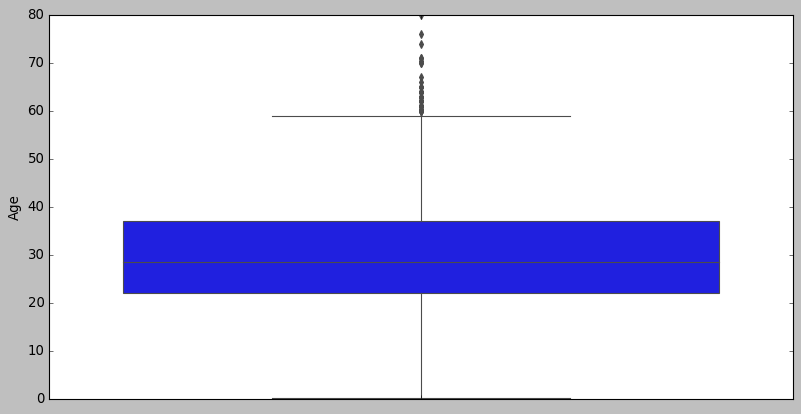

In [43]:
# your code here
sns.boxplot(y = titanic.Age)

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
#El boxplot me indica que la mayor parte de los datos se encuentra en el rango entre 20 a 38 años, y el 50% de los datos
#está bajo los 30 años.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

<AxesSubplot:xlabel='Age'>

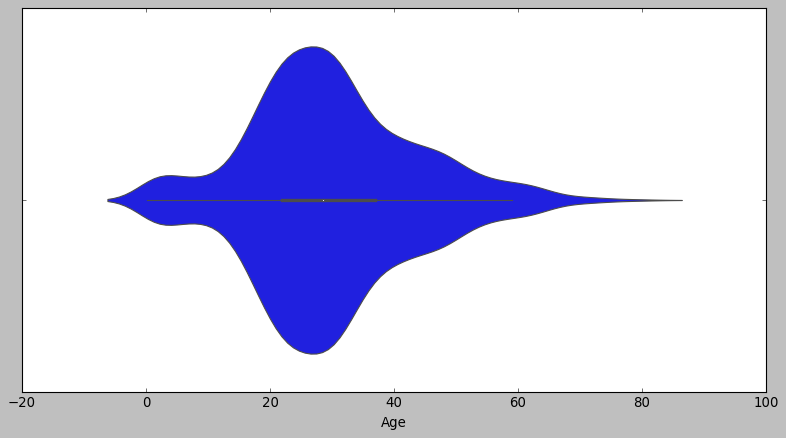

In [47]:
#your code here
#sns.displot(data=titanic, x="Age", kind="kde")
sns.violinplot(x='Age', data=titanic)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
#El Violinplot me entrega una mezcla entre la distribución de mis datos, puedo ver claramente que se concentran entre 20 y 40 años
# y además incluye la información de los cuartiles de boxplot.
#Es un boxplot potenciado visualmente.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

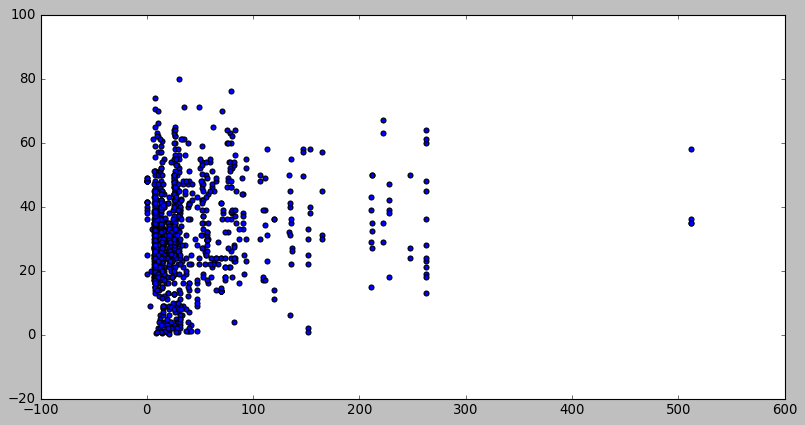

In [51]:
#your code-1st way
plt.scatter(titanic.Fare, titanic.Age)

<AxesSubplot:xlabel='Fare', ylabel='Age'>

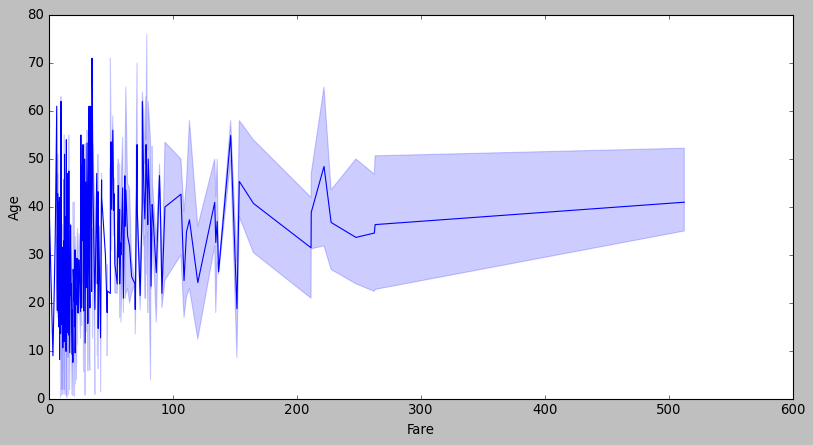

In [48]:
# your code-2nd way
sns.lineplot(x='Fare', y='Age', data=titanic)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

<AxesSubplot:>

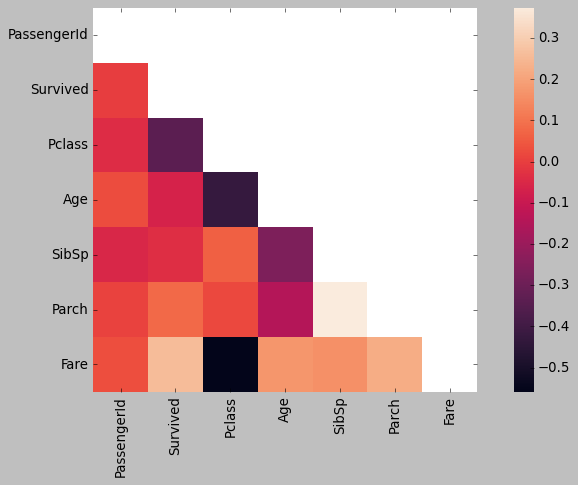

In [59]:
#your code here
corr= titanic.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask,square=True)

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
#las más correlacionadas deben ser, ser las más cercanas a 1(color más amarillo) o -1(más morado oscuro),
#por lo tanto las variables más correlacionadas deben ser Pclass y Fare, seguido de Pclass y Age

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

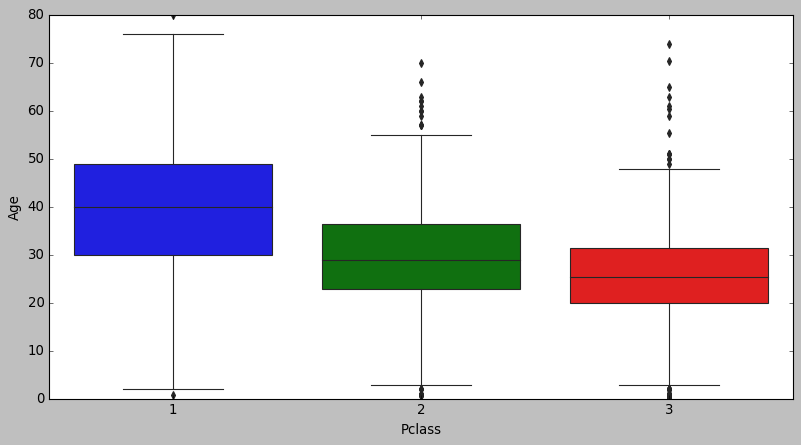

In [61]:
#your code here
sns.boxplot(y = titanic.Age, x=titanic.Pclass)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

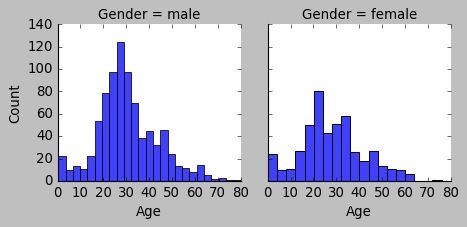

In [65]:
#your code here
grid=sns.FacetGrid(data=titanic, col='Gender')
grid.map(sns.histplot,'Age')